![BCC](https://bccfilkom.net/static/assets/images/BCC-Logo.svg)

# Diamond Price Recommendation

# Methodology

Our ability to use the data within the decision making process is either lost or not maximized as all too often, **we don't have a solid understanding of the questions being asked** and how to apply the data correctly to the problem at hand. It's important to consider it because all too often there is a temptation to bypass methodology and jump directly to solutions.

Let's start with explaining what a methodology is. *Methodology* is a system of methods used in a particular area of study or activity.

So in this project, I will be using methodology called *Foundational Methodology for Data Science*.

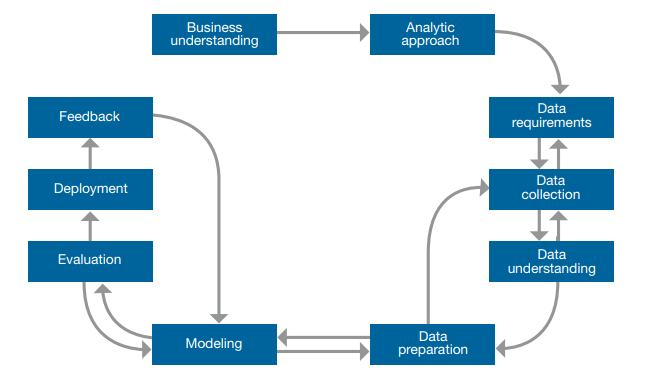

# Business understanding

Case Study:

Donald is a businessman in a New York City. He's own a jewelry store. Help him to.

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Basic Library
import warnings
import os
import numpy as np
np.random.seed(7)
import pandas as pd
import statistics
import math
from timeit import default_timer as timer

# Preprocessing Library
#!pip install missingno
#import missingno as msno
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import vtreat

# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
#import matplotlib.pylab as pylab

# Dimentionality Reduction & Normalization Library
#from sklearn.preprocessing import normalize
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pickle

# Model Evaluation Library
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [8]:
# Check the version
print(f'Matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')

Matplotlib: 3.7.2
pandas: 1.5.3
numpy: 1.25.0


In [9]:
# This is for my personal laptop directory
!copy kaggle.json "C:\Users\MSI-G63\.kaggle\kaggle.json"
!kaggle datasets download -d nancyalaswad90/diamonds-prices

The system cannot find the file specified.
diamonds-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
# Unzipping file that has been downloaded using kaggle API
import zipfile

with zipfile.ZipFile('diamonds-prices.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [11]:
# Print path of each file in the current directory
# './' = current directory
for dirpath, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

./Diamonds Prices2022.csv
./diamonds-prices.zip
./main_diamond_modified.ipynb
./main_diamond_original.ipynb
./.ipynb_checkpoints\main_diamond_modified-checkpoint.ipynb
./.mrx-link-logs\mrx-link-14428.log
./.mrx-link-logs\mrx-link-20396.log
./catboost_info\catboost_training.json
./catboost_info\learn_error.tsv
./catboost_info\time_left.tsv
./catboost_info\learn\events.out.tfevents


In [65]:
# Reading data to a dataframe
dat = pd.read_csv('./Diamonds Prices2022.csv')

# <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> DATA PROFILING </p>

## Making sure the datatypes are correct

* Numerical columns --> int or float
* Categorical columns --> categorical

In [68]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


* `cut` should be ordered categorical.
* `color` should be ordered categorical.
* `clarity` should be ordered categorical.

In [91]:
# For now we will set it as `category`
dat[['cut', 'color', 'clarity']] = dat[['cut', 'color', 'clarity']].astype('category')

In [88]:
cat_cols = dat.select_dtypes(include='category')
for c in cat_cols.columns:
    print(cat_cols[c].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


In [ ]:
cut_cat = pd.CategoricalDtype(categories=['

In [90]:
import pandas as pd

# Create a DataFrame with a categorical column
data = pd.DataFrame({'Category': ['Low', 'Medium', 'High']})

# Define the ordering of the categorical values
cat_dtype = pd.CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

# Convert the column to the specified categorical data type
data['Category'] = data['Category'].astype(cat_dtype)

# Check the ordering of the categorical column
print(data['Category'].cat.categories)


Index(['Low', 'Medium', 'High'], dtype='object')


In [70]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  53943 non-null  int64   
 1   carat       53943 non-null  float64 
 2   cut         53943 non-null  category
 3   color       53943 non-null  category
 4   clarity     53943 non-null  category
 5   depth       53943 non-null  float64 
 6   table       53943 non-null  float64 
 7   price       53943 non-null  int64   
 8   x           53943 non-null  float64 
 9   y           53943 non-null  float64 
 10  z           53943 non-null  float64 
dtypes: category(3), float64(6), int64(2)
memory usage: 3.4 MB


In [71]:
dat.shape

(53943, 11)

In [72]:
dat.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [73]:
dat.describe()

Unnamed: 0         carat         depth         table         price  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935     61.749322     57.457251   3932.734294   
std    15572.147122      0.473999      1.432626      2.234549   3989.338447   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26972.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.500000      1.040000     62.500000     59.000000   5324.000000   
max    53943.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53943.000000  53943.000000  53943.000000  
mean       5.731158      5.734526      3.538730  
std        1.121730      1.142103      0.705679  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [76]:
# Use for describing category data type
dat.describe(include=['category'])

cut  color clarity
count   53943  53943   53943
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13067

In [77]:
dat.nunique()

Unnamed: 0    53943
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [21]:
# Checks for missing or null values
dat.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [22]:
# Checks for a duplicates
dat.duplicated().sum()

0

<p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">DATA CLEANING & DATA PREPROCESSING</p>

In [23]:
dataclean = dat.copy()
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [24]:
dataclean.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [25]:

dataclean.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [26]:
dataclean.describe()

carat         depth         table         price             x  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean       0.797935     61.749322     57.457251   3932.734294      5.731158   
std        0.473999      1.432626      2.234549   3989.338447      1.121730   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53943.000000  53943.000000  
mean       5.734526      3.538730  
std        1.142103      0.705679  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Dari code diatas terlihat bahwa nilai minimal kolom x,y, dan z adalah 0. sedangkan untuk sebuah diamond pasti memiliki dimensi. untuk itu dilakukan pemeriksaan dahulu lalu ditentukan apakah data tersebut dihapus atau di isi dengan data yg baru.

In [27]:
dataclean[(dataclean['x']==0)]

carat        cut color clarity  depth  table  price    x     y    z
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0

In [28]:
dataclean[(dataclean['y']==0)]

carat        cut color clarity  depth  table  price    x    y    z
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.0  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.0  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.0  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.0  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.0  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.0  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.0  0.0

In [29]:
dataclean[(dataclean['z']==0)]

carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

dari tampilan diatas diketahui bahwa ada 7 rows yang kolom x,y,z nya bernilai 0. sehingga 7 rows tersebut dihapus dan 1 rows yang kolom x, dan z nya bernilai 0 juga dihapus. sedangkan untuk rows dengan kolom z bernilai 0 tidak dihapus, karena nilai z dapat dicari dengan rumus dibawah ini

In [30]:
datatest = dataclean.copy()

# zerodrop = datatest[ (datatest['x'] == 0) & (datatest['y'] == 0) & (datatest['z'] == 0)].index
# datatest.drop(zerodrop , inplace=True)

xzero = datatest[ (datatest['x'] == 0)].index
datatest.drop(xzero , inplace=True)

datatest.shape

(53935, 10)

Ada sumber yang mengatakan bahwa rumus depth = z / mean(x, y) atau 2 * z / (x + y) 

namun rumus tersebut masih harus dibuktikan kebenarannya dengan cara dibawah ini

In [31]:
# total depth percentage = z / mean(x, y) atau 2 * z / (x + y)

dataclean['Depth Prediction 1'] = dataclean['z'] / ((dataclean['x']+dataclean['y'])/2) * 100

dataclean['Depth Prediction 2'] = 2*dataclean['z'] / (dataclean['x']+dataclean['y'])* 100

dataclean.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   Depth Prediction 1  Depth Prediction 2  
0           61.286255           61.286255  
1           59.767141           59.767141  
2           56.896552           56.896552  
3           62.396204           62.396204  
4           63.291139           63.291139

In [32]:
corrspearman1 = dataclean['depth'].corr(dataclean['Depth Prediction 1'], method='spearman')
corrspearman2 = dataclean['depth'].corr(dataclean['Depth Prediction 2'], method='spearman')

corrkendall1 = dataclean['depth'].corr(dataclean['Depth Prediction 1'], method='kendall')
corrkendall2 = dataclean['depth'].corr(dataclean['Depth Prediction 2'], method='kendall')

print('Koefisien korelasi spearman antara DP1 dan DP:', corrspearman1)
print('Koefisien korelasi spearman antara DP2 dan DP:', corrspearman2)

print('Koefisien korelasi kendall antara DP1 dan DP:', corrkendall1)
print('Koefisien korelasi kendall antara DP2 dan DP:', corrkendall2)

Koefisien korelasi spearman antara DP1 dan DP: 0.9964937306635858
Koefisien korelasi spearman antara DP2 dan DP: 0.9964937306635858
Koefisien korelasi kendall antara DP1 dan DP: 0.9807668670558525
Koefisien korelasi kendall antara DP2 dan DP: 0.9807668670558525


![Picture title](image-20230302-181652.png)

In [33]:
dataclean.shape

(53943, 12)

In [34]:
dataclean.drop('Depth Prediction 2', axis=1, inplace=True)
dataclean.drop('Depth Prediction 1', axis=1, inplace=True)

dataclean.shape

(53943, 10)

dari rumus depth didapatkan bahwa z = total depth percentage * (x+y)/2

In [35]:
# z = total depth percentage * (x+y)/2

zZero = datatest[(datatest['z']==0)]

print(zZero.shape)

(12, 10)


In [36]:
# untuk melihat hasil kolom z setelah dihitung menggunakan rumus diatas

zZero['z'] = zZero.apply(lambda z: z['depth'] * (z['x']+z['y'])/200 if z['z'] ==0 else z['z'], axis=1)

zZero.head(12)

carat      cut color clarity  depth  table  price     x     y         z
2207    1.00  Premium     G     SI2   59.1   59.0   3142  6.55  6.48  3.850365
2314    1.01  Premium     H      I1   58.1   59.0   3167  6.66  6.60  3.852030
4791    1.10  Premium     G     SI2   63.0   59.0   3696  6.50  6.47  4.085550
5471    1.01  Premium     F     SI2   59.2   58.0   3837  6.50  6.47  3.839120
10167   1.50     Good     G      I1   64.0   61.0   4731  7.15  7.04  4.540800
13601   1.15    Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  4.058160
24394   2.18  Premium     H     SI2   59.4   61.0  12631  8.49  8.45  5.031180
26123   2.25  Premium     I     SI1   61.3   58.0  15397  8.52  8.42  5.192110
27112   2.20  Premium     H     SI1   61.2   59.0  17265  8.42  8.37  5.137740
27503   2.02  Premium     H     VS2   62.7   53.0  18207  8.02  7.95  5.006595
27739   2.80     Good     G     SI2   63.8   58.0  18788  8.90  8.85  5.662250
51506   1.12  Premium     G      I1   60.4   59.0   2383  6.71  6.67  4.040760

In [37]:
datatest['z'] = datatest.apply(lambda z: z['depth'] * (z['x']+z['y'])/200 if z['z'] ==0 else z['z'], axis=1)

datatest[(datatest['z']==0)]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []

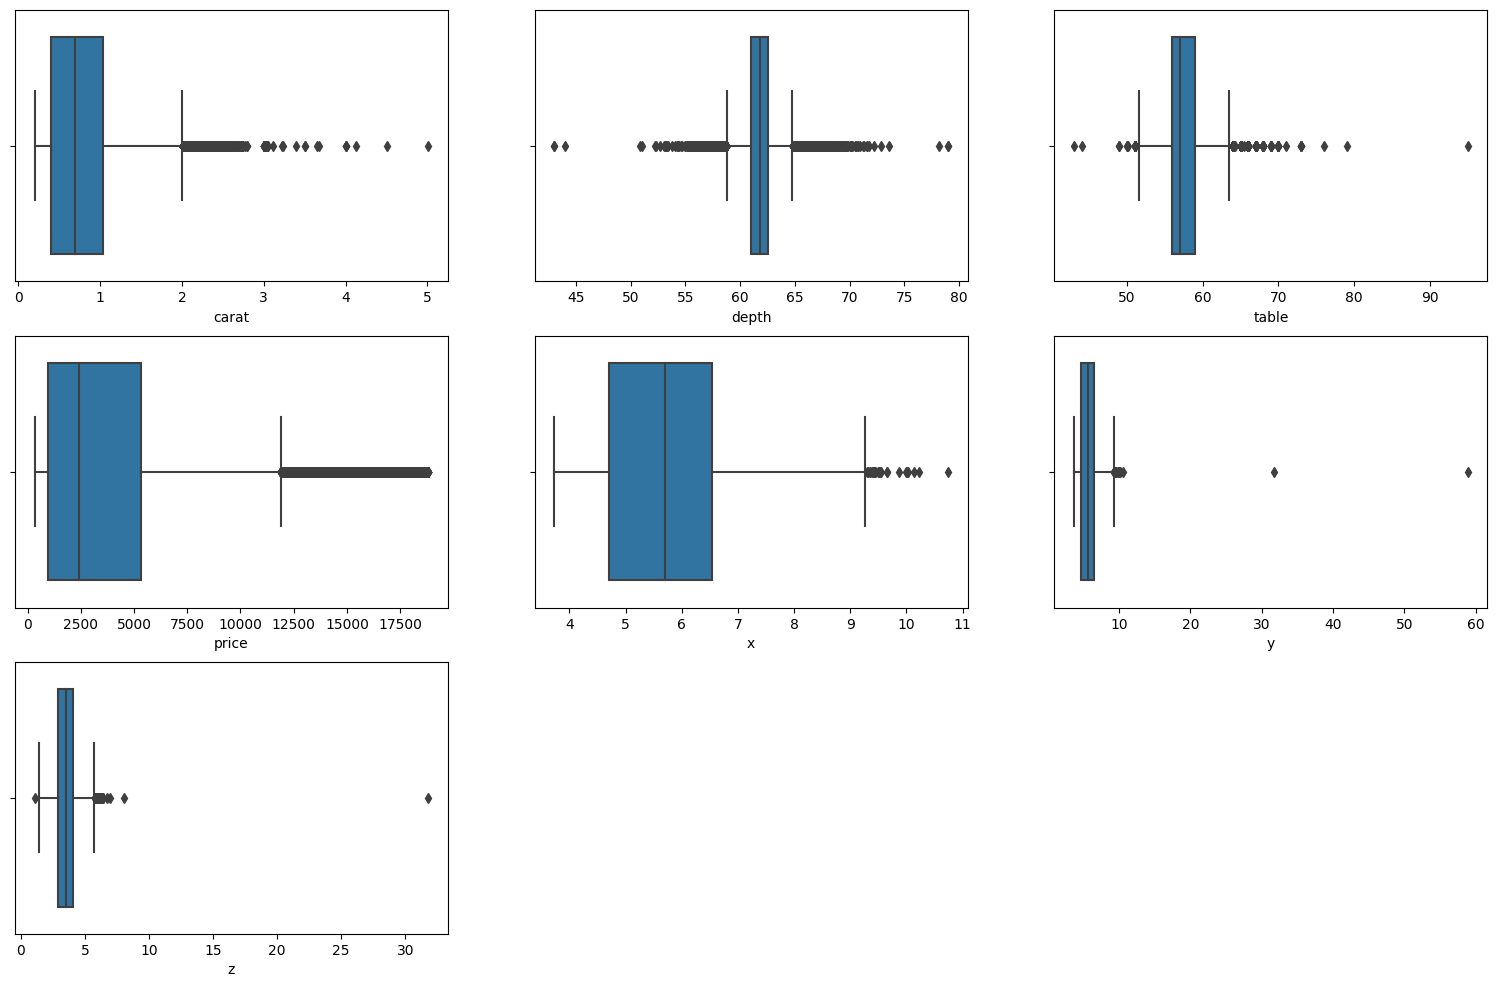

In [38]:
numcols = datatest.select_dtypes('number')
objcols = datatest.select_dtypes('O')

i = 1
plt.figure(figsize=(19, 12))
for c in numcols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=datatest[c])
    i+=1

In [39]:
def IQR(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  Minimum = Q1 - 1.5 * IQR
  Maximum = Q3 + 1.5 * IQR
  filter_lower = df[column] < Minimum
  filter_upper = df[column] > Maximum
  return filter_lower, filter_upper

In [40]:
dataIQR = dataclean.copy()

i = 1
for c in numcols.columns:
    filterL, filterU = IQR(dataIQR,c)
    i+=1

In [41]:
dataIQR = dataIQR[filterL | filterU]

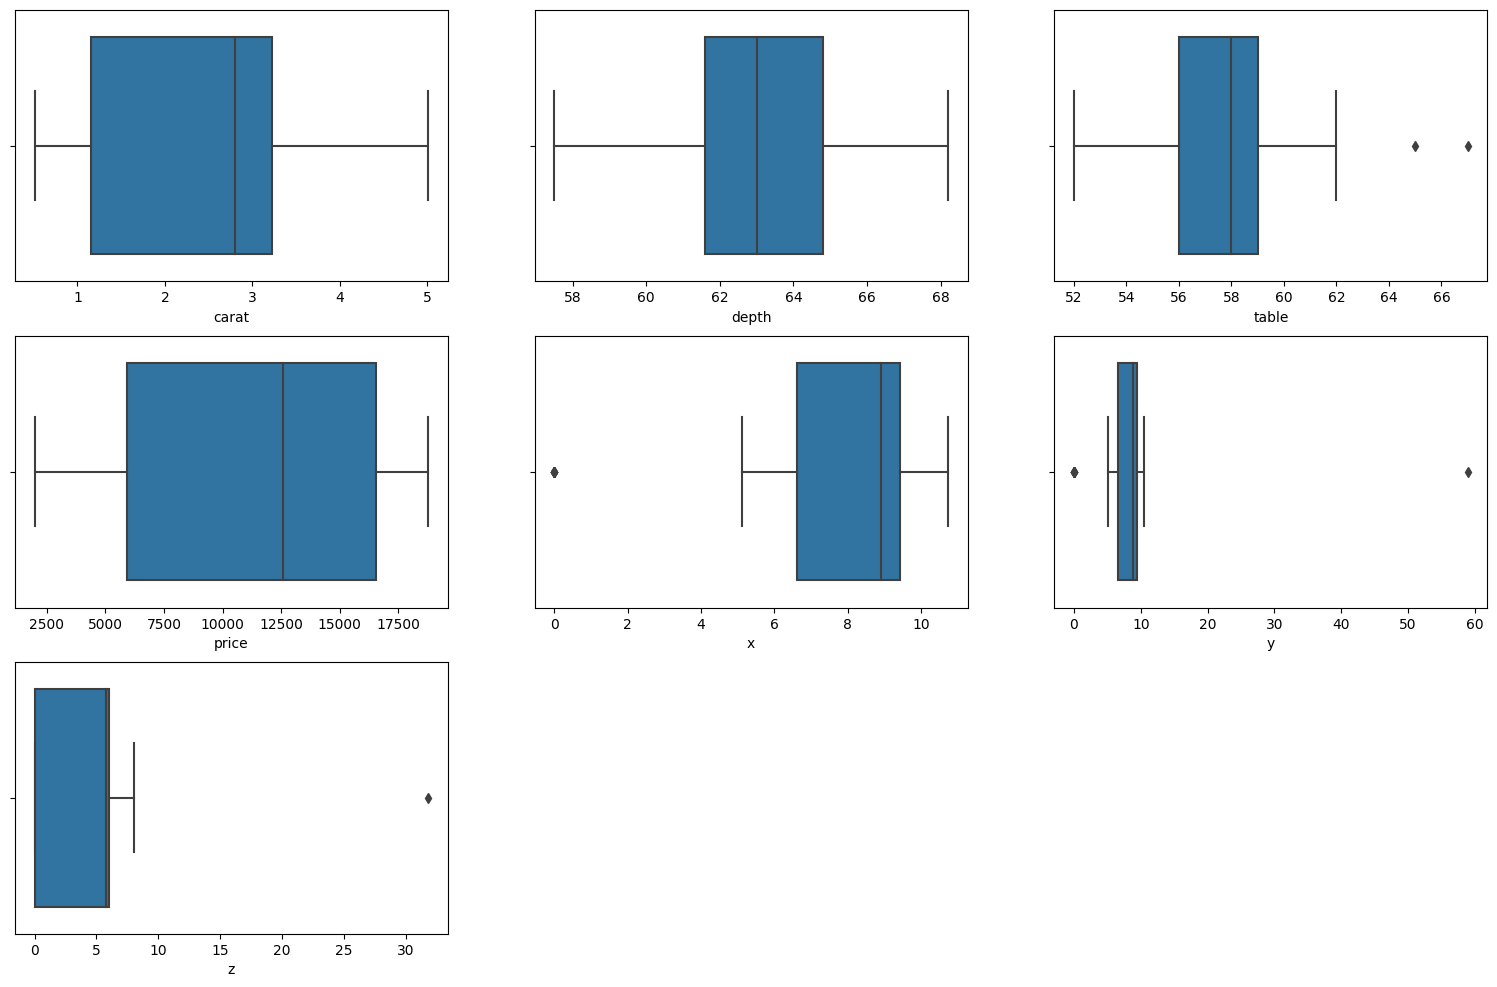

In [42]:
i = 1
plt.figure(figsize=(19, 12))
for c in numcols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=dataIQR[c])
    i+=1

In [43]:
dataZs = datatest.copy()
numcols = dataZs.select_dtypes('number')
objcols = dataZs.select_dtypes('O')
dataZs = dataZs[(np.abs(stats.zscore(numcols)) < 3).all(axis=1)]

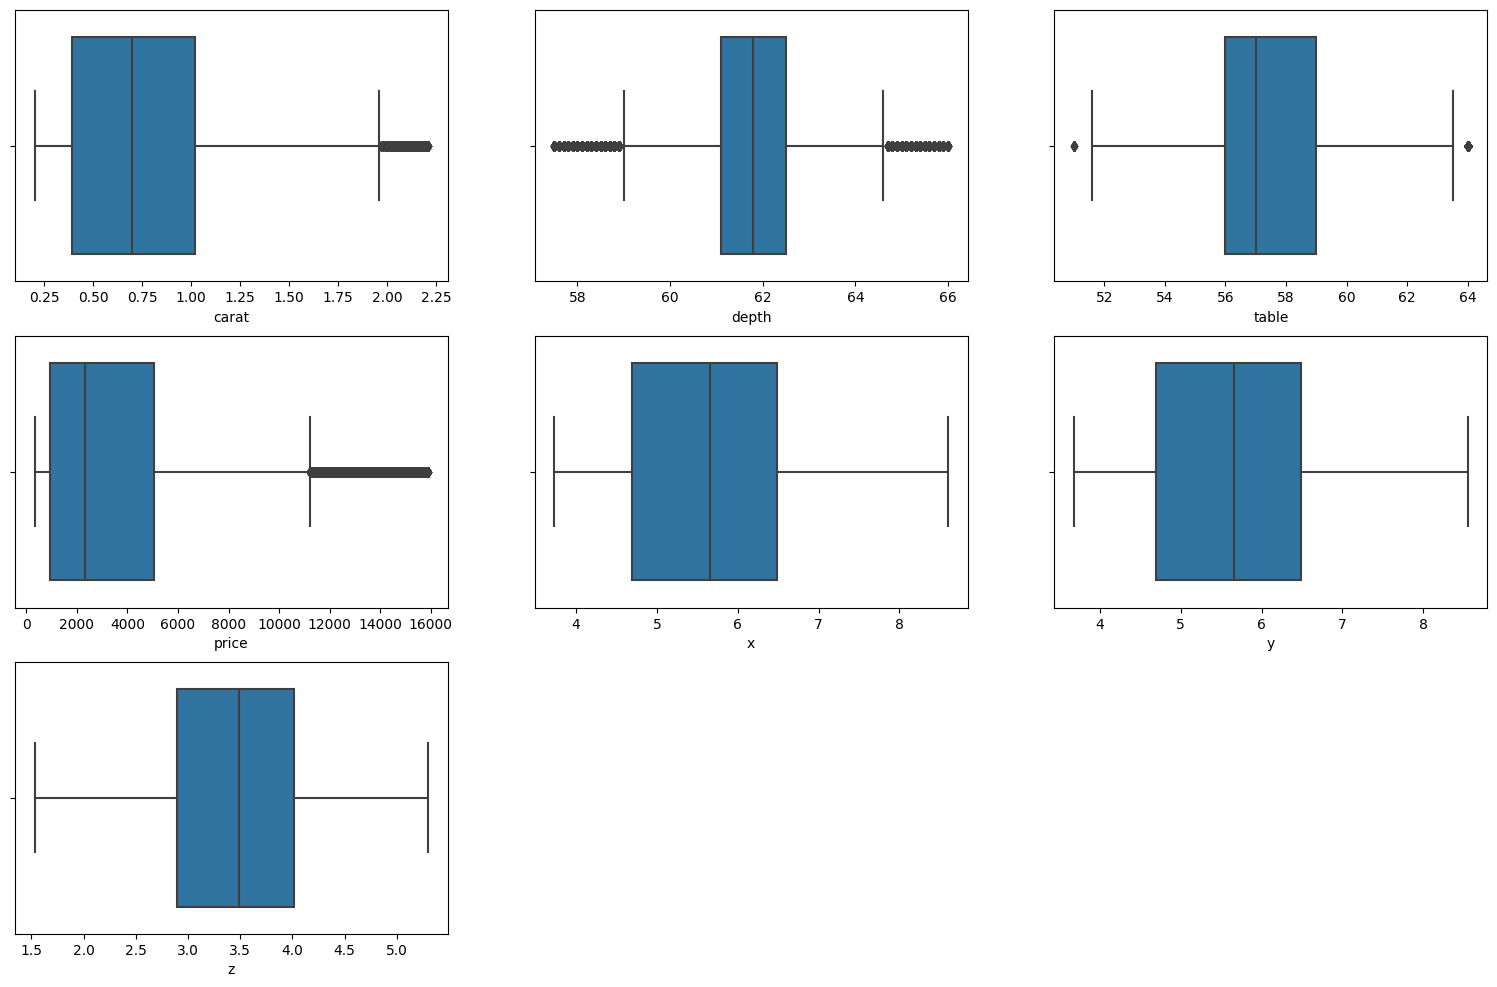

In [44]:
i = 1
plt.figure(figsize=(19, 12))
for c in numcols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=dataZs[c])
    i+=1

In [45]:
print('Setelah menggunakan fungsi IQR',dataIQR.shape)

print('Setelah menggunakan fungsi Zscore',dataZs.shape)

Setelah menggunakan fungsi IQR (49, 10)
Setelah menggunakan fungsi Zscore (51600, 10)


In [46]:
label_data = dataZs.copy()

numcols = label_data.select_dtypes('number')
objcols = label_data.select_dtypes('O')

mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

# membuat objek LabelEncoder
encoder = LabelEncoder()

# melakukan encoding pada kolom 'cut'
label_data['cut'] = encoder.fit_transform(label_data['cut'].replace(mapping))


In [47]:
mapping = {'I1': 0, 'SI1': 1, 'SI2': 2, 'VS1': 3, 'VS2': 4, 'VVS1': 5, 'VVS2': 6, 'IF': 7}

# membuat objek LabelEncoder
encoder = LabelEncoder()

# melakukan encoding pada kolom 'clarity'
label_data['clarity'] = encoder.fit_transform(label_data['clarity'].replace(mapping))

In [48]:
mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

# membuat objek LabelEncoder
encoder = LabelEncoder()

# melakukan encoding pada kolom 'clarity'
label_data['color'] = encoder.fit_transform(label_data['color'].replace(mapping))

In [49]:
label_data_scalled = label_data.copy()

scaler = MinMaxScaler()

# Fit and transform the data
label_data_scalled['price'] = scaler.fit_transform(pd.DataFrame(label_data_scalled['price']))

# <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

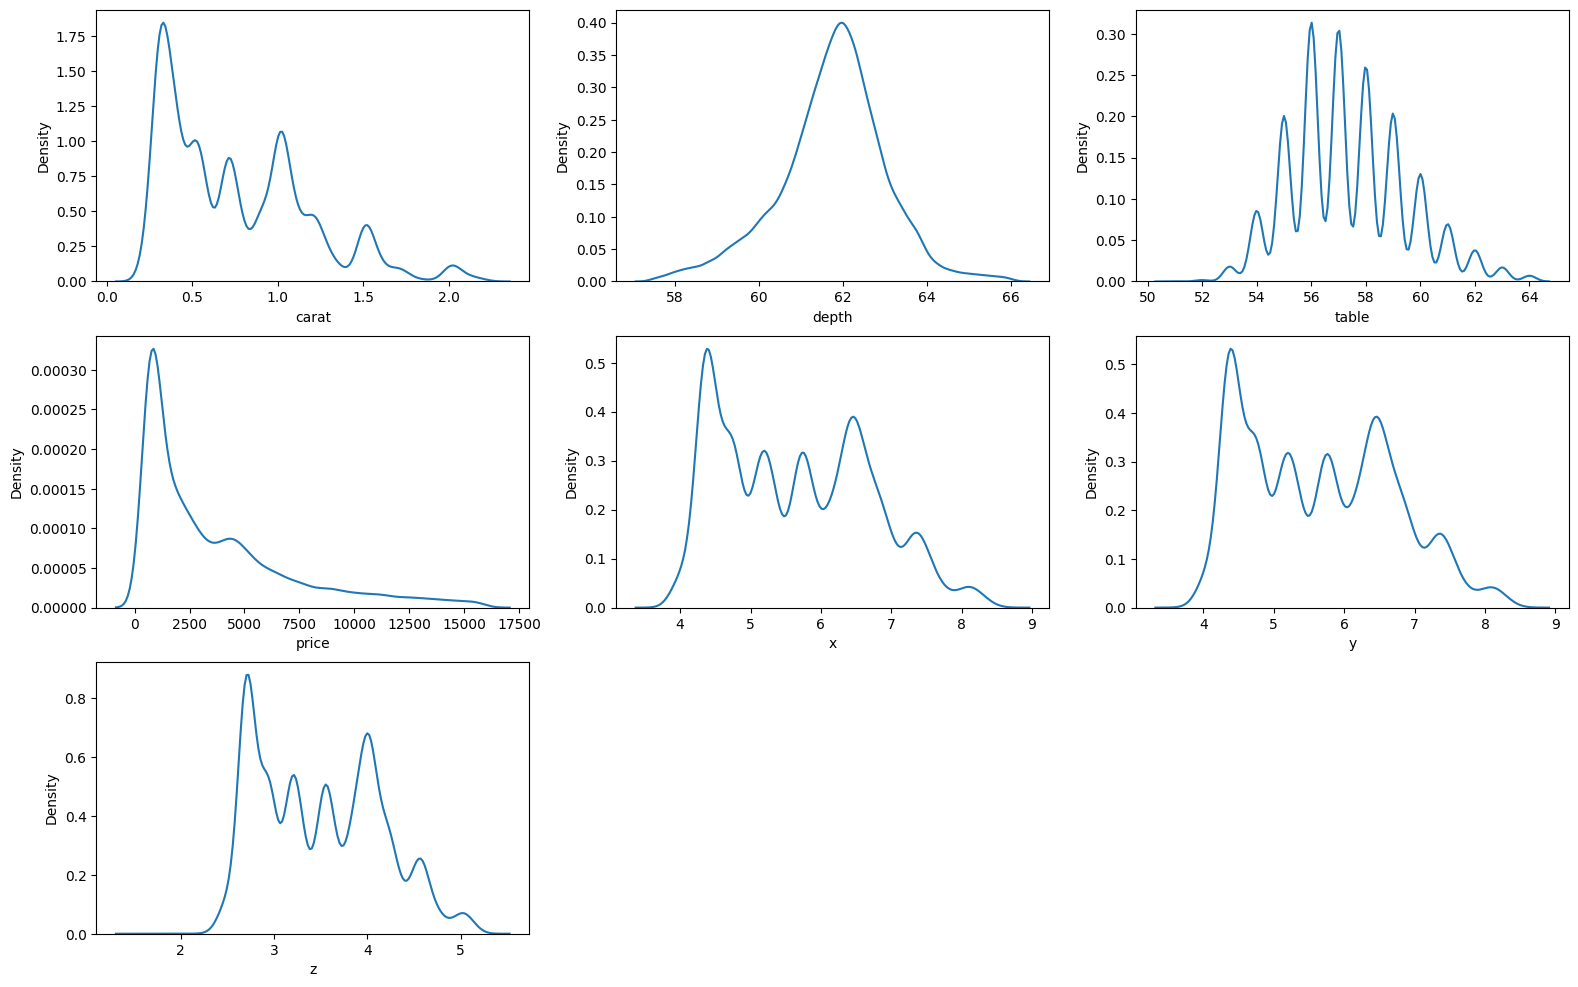

In [50]:
#Pertama kita melihat semua distribusi data 

i = 1
plt.figure(figsize=(19, 12))
for c in numcols.columns:
    plt.subplot(3, 3, i)
    sns.kdeplot(data=label_data[c])
    i+=1

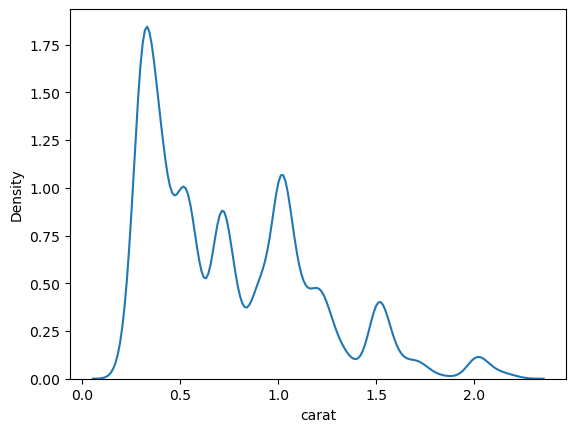

In [46]:
sns.kdeplot(data=label_data['carat'])
plt.show()

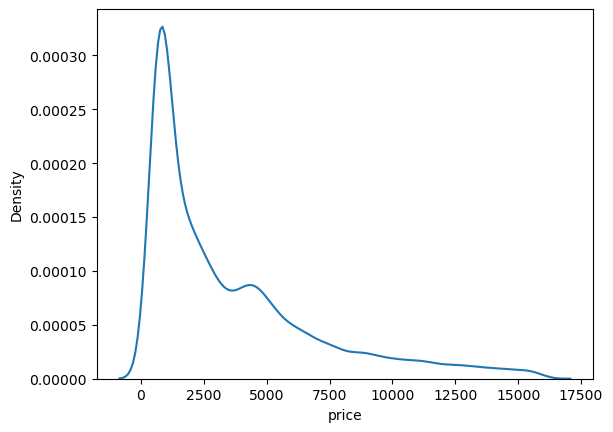

In [47]:
sns.kdeplot(data=label_data['price'])
plt.show()

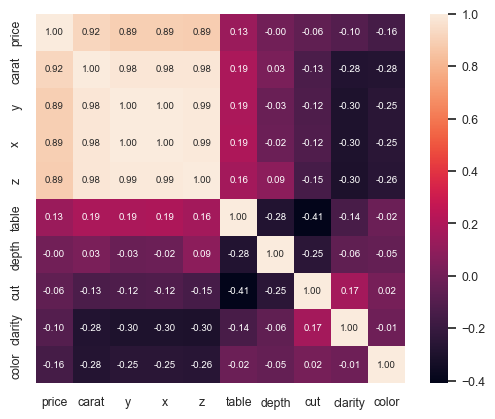

In [48]:
# Selanjutnya kita gunakan pearson correlation matrix untuk mengetahui koreleasi antara price dan semua feature

CorrMat = label_data.corr()

cols = CorrMat.nlargest(10, 'price')['price'].index
cm = np.corrcoef(label_data[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> 1. Apa hubungan harga dengan 4C (Cut, Color, Carat, Clarity)?</p>

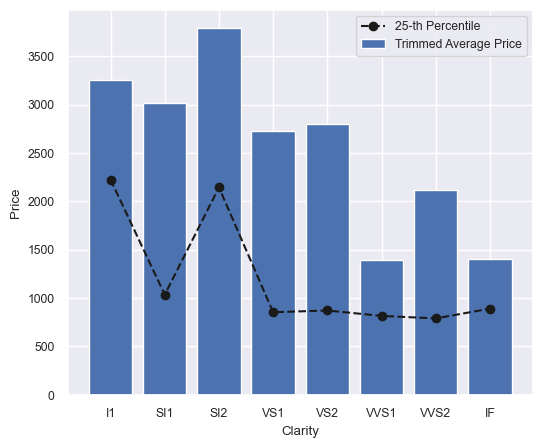

In [49]:
# Clarity

from scipy.stats import trim_mean

grouped = label_data.groupby('clarity')
grouped_price = grouped['price']

# Bikin class untuk bikin fungsi baru yang bisa di masukin ke pandas.agg
class Quantile:
    def __init__(self, q):
        self.q = q
        
    def __call__(self, x):
        return x.quantile(self.q)
        # Or using numpy
        # return np.quantile(x.dropna(), self.q)

avg_price = grouped_price.agg(trim_mean, 0.15)
min_price = grouped_price.agg(Quantile(0.25))

plt.figure(figsize = (6,5))
plt.bar(avg_price.index, avg_price, label = 'Trimmed Average Price')
plt.plot(min_price.index, min_price, 'k--o', label = '25-th Percentile')
plt.xlabel("Clarity")
plt.ylabel("Price")

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF'])

plt.legend(loc='best')

plt.show()

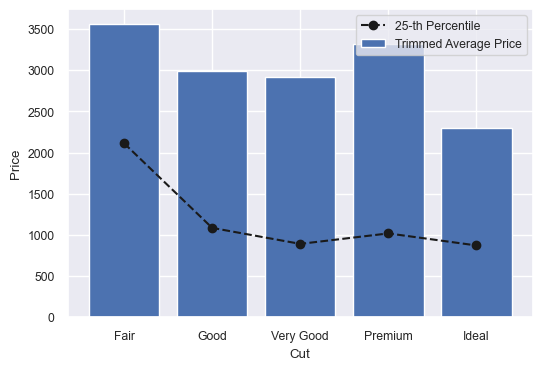

In [50]:
# Cut
# mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

grouped = label_data.groupby('cut')
grouped_price = grouped['price']


avg_price = grouped_price.agg(trim_mean, 0.15)
min_price = grouped_price.agg(Quantile(0.25))

plt.figure(figsize = (6,4))
plt.bar(avg_price.index, avg_price, label = 'Trimmed Average Price')
plt.plot(min_price.index, min_price, 'k--o', label = '25-th Percentile')
plt.xlabel("Cut")
plt.ylabel("Price")

plt.xticks([0, 1, 2, 3, 4], ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

plt.legend(loc='best')

plt.show()

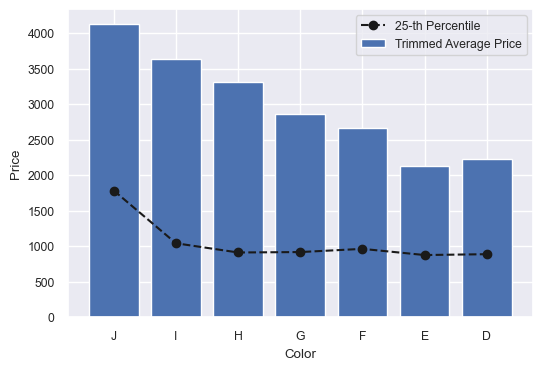

In [51]:
# Color
# mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

grouped = label_data.groupby('color')
grouped_price = grouped['price']

avg_price = grouped_price.agg(trim_mean, 0.15)
min_price = grouped_price.agg(Quantile(0.25))

plt.figure(figsize = (6,4))
plt.bar(avg_price.index, avg_price, label = 'Trimmed Average Price')
plt.plot(min_price.index, min_price, 'k--o', label = '25-th Percentile')
plt.xlabel("Color")
plt.ylabel("Price")

plt.xticks([0, 1, 2, 3, 4, 5, 6 ], ['J', 'I', 'H', 'G', 'F', 'E', 'D'])

plt.legend(loc='best')

plt.show()

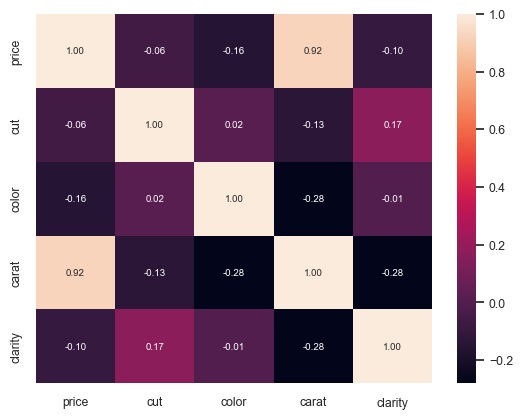

In [52]:
selected_cols = ['price', 'cut', 'color', 'carat', 'clarity']
df_selected = label_data[selected_cols]

corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', annot_kws={'size': 7})
plt.show()

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> 2. Fitur apa yang paling mempengaruhi harga diamond meningkat?</p>

<Axes: xlabel='carat', ylabel='price'>

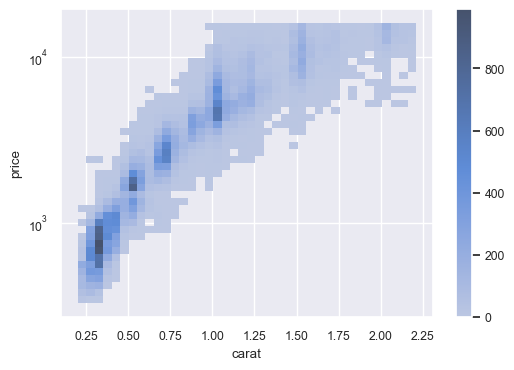

In [53]:
# Histrogram carat

plt.figure(figsize=(6, 4))
sns.histplot(
    label_data, x="carat", y="price",
    bins=40, log_scale=(False, True),
    cbar=True,
)

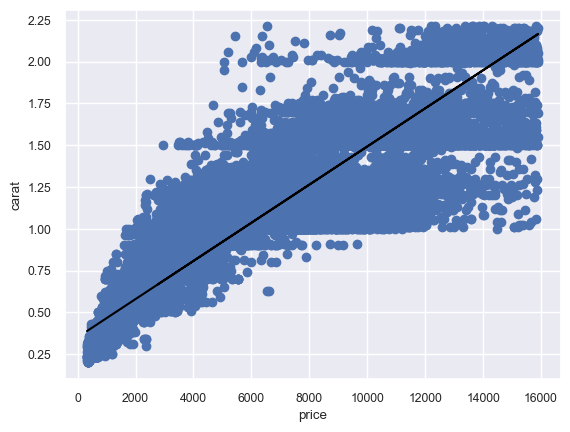

In [54]:
plt.scatter(label_data['price'], label_data['carat'])
m, b = np.polyfit(label_data['price'], label_data['carat'], 1)
plt.plot(label_data['price'], m*label_data['price']+b,color='black')

plt.xlabel('price')
plt.ylabel('carat')

plt.show()

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> 3. Fitur apa yang tidak mempengaruhi harga diamond?</p>

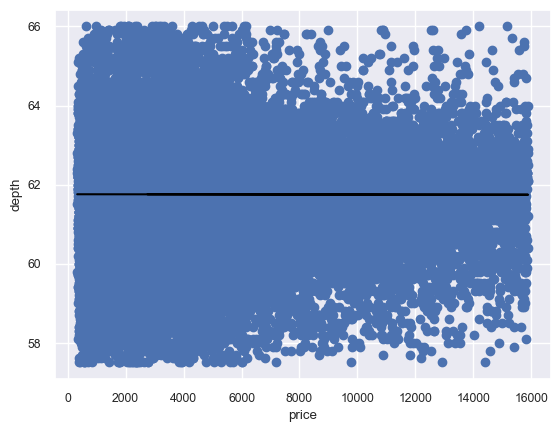

In [55]:
plt.scatter(label_data['price'], label_data['depth'])
m, b = np.polyfit(label_data['price'], label_data['depth'], 1)
plt.plot(label_data['price'], m*label_data['price']+b,color='black')
plt.xlabel('price')
plt.ylabel('depth')
plt.show()

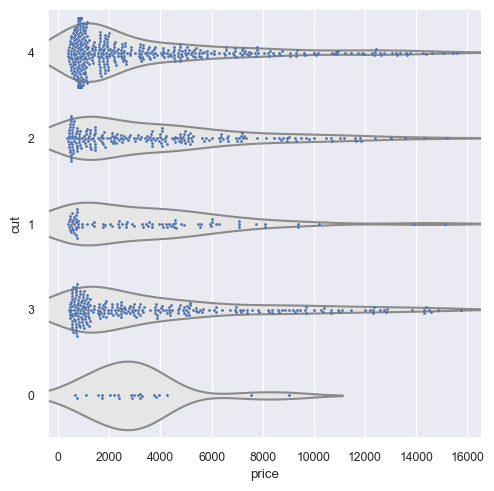

In [56]:
label_data_cat = label_data.copy()
label_data_cat['clarity'] = label_data_cat['clarity'].map(str)
label_data_cat['cut'] = label_data_cat['cut'].map(str)
label_data_cat['color'] = label_data_cat['color'].map(str)

small_sample = label_data_cat.sample(1000)

sns.catplot(data=small_sample, x="price", y="cut", kind="violin", color=".9", inner=None)
sns.swarmplot(data=small_sample, x="price", y="cut", size=2)
sns.set(font_scale=0.5)

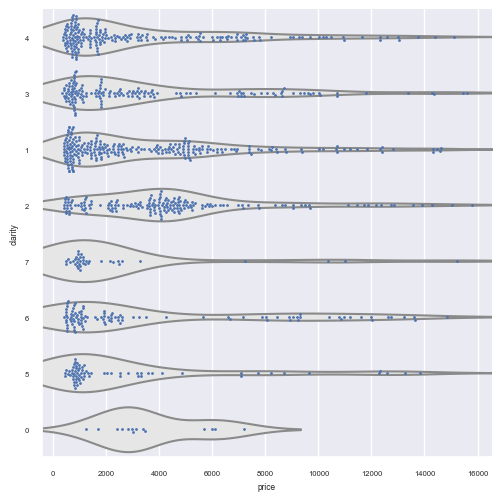

In [57]:
sns.catplot(data=small_sample, x="price", y="clarity", kind="violin", color=".9", inner=None)
sns.swarmplot(data=small_sample, x="price", y="clarity", size=2)
sns.set(font_scale=0.5)

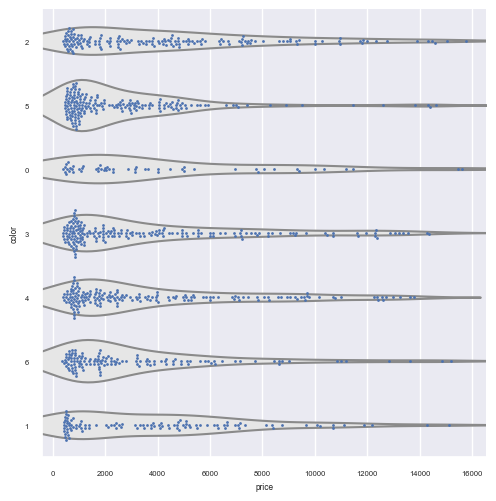

In [58]:
sns.catplot(data=small_sample, x="price", y="color", kind="violin", color=".9", inner=None)
sns.swarmplot(data=small_sample, x="price", y="color", size=2)
sns.set(font_scale=0.5)

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">4. Apakah ada feature yang mempengaruhi turunnya harga diamond?</p>

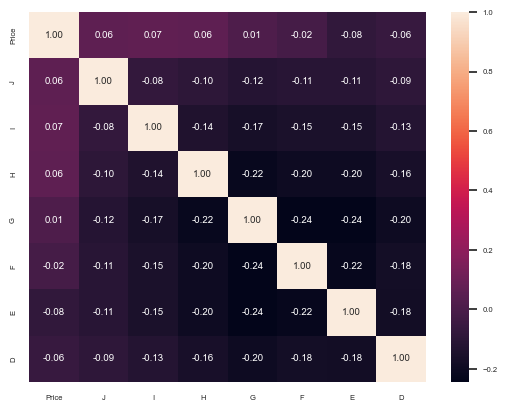

In [59]:
price_color_df = label_data[['color', 'price']]

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(price_color_df[['color']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = price_color_df.join(encoder_df)

final_df = final_df.drop(labels='color', axis=1)

final_df = final_df.set_axis(['Price', 'J', 'I', 'H', 'G', 'F', 'E', 'D'], axis=1, inplace=False)

corr_matrix = final_df.corr()
hm = sns.heatmap(corr_matrix, annot=True, fmt='.2f', annot_kws={'size': 7})

plt.show()

# <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> MACHINE LEARNING MODELING I</p>

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">train-test data split</p>

In [60]:
# train and test data split

#X = label_data.drop(["price"],axis =1)
#y = label_data["price"]


#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(label_data, target = 'price', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)

# Melihat semua bentuk dataset
print(f"Bentuk data train:\n{X_train.shape}")
print(y_train.shape)
print(f"Bentuk data valid:\n{X_valid.shape}")
print(y_valid.shape)
print(f"Bentuk data test:\n{X_valid.shape}")
print(y_test.shape)

Bentuk data train:
(36120, 9)
(36120,)
Bentuk data valid:
(7740, 9)
(7740,)
Bentuk data test:
(7740, 9)
(7740,)


## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">preprocessing</p>

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">Base Model</p>

In [67]:
# Verbosity = log output(aku non-aktifkan biar bersih outputnya)
# Di Machine Learning Modeling I ini, semua model pakai default value parameter
# Hasil performa disini sebagai base score

# Linear Regression
p_lr = Pipeline([("scalar", StandardScaler()),
                        ("lr_regressor", LinearRegression())])

# XGBoost
p_xgb = Pipeline([("scalar",StandardScaler()),
                     ("xgb_regressor",XGBRegressor(verbosity=0))])

# CatBoost
p_cat = Pipeline([("scalar", StandardScaler()),
                    ("cat_regressor", CatBoostRegressor(verbose=False))])

# Linear Regression vtreat
p_lr_v = Pipeline([("vtreat", vtreat.NumericOutcomeTreatment(outcome_name="price")),
                        ("lr_regressor", LinearRegression())])

# XGBoost vtreat
p_xgb_v = Pipeline([("vtreat", vtreat.NumericOutcomeTreatment(outcome_name="price")),
                     ("xgb_regressor",XGBRegressor(verbosity=0))])

# CatBoost vtreat
p_cat_v = Pipeline([("vtreat", vtreat.NumericOutcomeTreatment(outcome_name="price")),
                    ("cat_regressor", CatBoostRegressor(verbose=False))])


## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">Training</p>

In [68]:
pipelines = [p_lr, p_xgb, p_cat, p_lr_v, p_xgb_v, p_cat_v]

pipe_dict = {0: "Linear Regression", 1: "XGBRegressor", 2: "CatBoostRegressor", 3: "Linear Regression V", 4: "XGBRegressor V", 5: "CatBoostRegressor V",}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [69]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Linear Regression: -1072.300627 
XGBRegressor: -454.084934 
CatBoostRegressor: -434.900058 


TypeError: NumericOutcomeTreatment.__init__() got an unexpected keyword argument 'indicator_min_fraction'

In [70]:
from sklearn.metrics import mean_absolute_error

def fit_and_print(p, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    p.fit(X_train, y_train)
    train_preds = p.predict(X_train)
    test_preds = p.predict(X_test)
    print('Training error: ' + str(mean_absolute_error(train_preds, y_train)))
    print('Test error: ' + str(mean_absolute_error(test_preds, y_test)))

In [74]:
pipelines = [p_lr, p_xgb, p_cat, p_lr_v, p_xgb_v, p_cat_v]

for pipe in pipelines:
    print(f"Algo {pipe}")
    fit_and_print(pipe)

Algo Pipeline(steps=[('scalar', StandardScaler()),
                ('lr_regressor', LinearRegression())])
Training error: 726.4238464902661
Test error: 726.9265810982085
Algo Pipeline(steps=[('scalar', StandardScaler()),
                ('xgb_regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
     

In [72]:
fit_and_print(p_lr)
fit_and_print(p_lr)
fit_and_print(p_lr)
fit_and_print(p_lr)

Training error: 726.4238464902661
Test error: 726.9265810982085
Training error: 726.4238464902661
Test error: 726.9265810982085
Training error: 726.4238464902661
Test error: 726.9265810982085
Training error: 726.4238464902661
Test error: 726.9265810982085


## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">Model Evaluation: RMSE & MAE</p>

### <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">RMSE Score antara 3 Model</p>

In [61]:
print("Hasil Cross-Validation-Score RMSE (train data)")
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score RMSE (train data)
Linear Regression: -1077.510678 
XGBRegressor: -451.422512 
CatBoostRegressor: -430.711985 


In [62]:
print("Hasil Cross-Validation-Score RMSE (test data)")
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_test, y_test, scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score RMSE (test data)
Linear Regression: -1069.266087 
XGBRegressor: -474.662857 
CatBoostRegressor: -453.036256 


### <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">MAE Score antara 3 Model</p>

In [63]:
print("Hasil Cross-Validation-Score MAE (train data)")
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train,scoring="neg_mean_absolute_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score MAE (train data)
Linear Regression: -730.262917 
XGBRegressor: -244.416140 
CatBoostRegressor: -236.796019 


In [64]:
print("Hasil Cross-Validation-Score MAE (test data)")
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_test, y_test,scoring="neg_mean_absolute_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score MAE (test data)
Linear Regression: -723.523121 
XGBRegressor: -253.237777 
CatBoostRegressor: -245.484155 


# <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> FEATURE SELECTION</p>

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> I. Variance Threshold</p>

sumber: https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f

In [65]:
# Variance Threshold
# Feature selector that removes all low-variance features.
# This feature selection algorithm looks only at the features (X), 
# not the desired outputs (y)

from sklearn.feature_selection import VarianceThreshold

In [66]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(label_data.drop(["price", "cut", "color", "clarity"],axis =1))

print(label_data.drop(["price", "cut", "color", "clarity"],axis =1).columns)
print(selector.get_support())

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
[ True  True  True  True  True  True]


In [67]:
# Tidak ada fitur yang memiliki Low Variation

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">II. SHAP (from catboost)</p>

<img src="https://github.com/radifan9/bcc_ds7_image/blob/main/image-20230310-072017.png?raw=true">

Dari nilai SHAP, kita dapat melihat bahwa fitur table, depth, dan cut memiliki impact yang kecil ke output dari model.

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">III. RFE</p>

In [68]:
from sklearn.feature_selection import RFE

In [69]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.15, max_depth = 5, n_estimators = 300)
rfe = RFE(estimator=xgb_reg, n_features_to_select=6)

In [70]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
rfe.fit(X_train, y_train)

[15:25:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None,
                           feature_types=None, gamma=None, gpu_id=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=0.15,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=5, max_leaves=None, min_child_weight=None,
                           missing=nan, monotone_constraints=None,
                           n_estimators=300, n_jobs=None,
                           num_parallel_tree=None, objective='reg:linear',
                           predictor=None, ...),
    n_features_to_select=6)

In [71]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

carat selected=True rank=1
cut selected=True rank=1
color selected=True rank=1
clarity selected=True rank=1
depth selected=False rank=3
table selected=False rank=4
x selected=False rank=2
y selected=True rank=1
z selected=True rank=1


# <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> FEATURE ENGINEERING</p>

tentang applying log

https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94

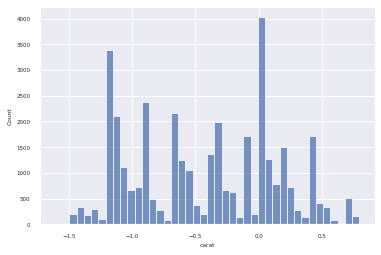

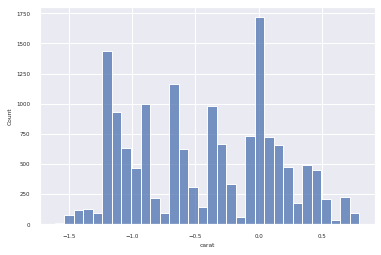

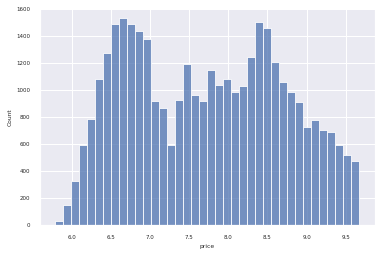

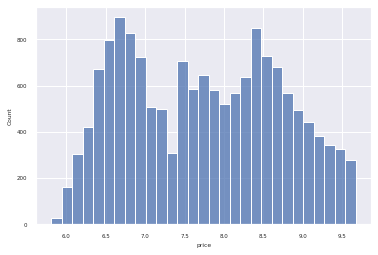

In [72]:
# kita lakuin log ke data train_test yang terpisah 
# untuk menghindari data leakege

# log transformation fitur carat

X_train_log = X_train.copy()
X_train_log['carat'] = np.log(X_train_log['carat'])

X_test_log = X_test.copy()
X_test_log['carat'] = np.log(X_test_log['carat'])

plt.figure(figsize=(6, 4))
sns.histplot(data=X_train_log['carat'])
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=X_test_log['carat'])
plt.show()

# log transformation price

y_train_log = y_train.copy()
y_train_log = np.log(y_train_log)

y_test_log = y_test.copy()
y_test_log = np.log(y_test_log)

plt.figure(figsize=(6, 4))
sns.histplot(data=y_train_log)
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=y_test_log)
plt.show()

In [73]:
X_train_log.head()

carat  cut  color  clarity  depth  table     x     y     z
15553  0.292670    2      0        3   61.7   59.0  7.03  7.14  4.37
53546 -0.198451    3      1        4   62.2   59.0  5.97  6.03  3.73
52104 -0.223144    2      4        2   61.0   60.0  5.95  5.98  3.64
44892 -0.693147    4      5        4   62.5   57.0  5.10  5.04  3.17
3308  -0.314711    2      5        3   60.9   61.0  5.79  5.81  3.53

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">Model Evaluation: RMSE & MAE</p>

In [74]:
# Making a log pipeline
# Linear Regression
pipeline_lr_log = Pipeline([("scalar1", StandardScaler()),
                        ("lr_regressor", LinearRegression())])

# XGBoost
pipeline_xgb_log = Pipeline([("scalar2",StandardScaler()),
                     ("xgb_regressor",XGBRegressor(verbosity=0))])

# CatBoost
pipeline_cat_log = Pipeline([("scalar3", StandardScaler()),
                    ("cat_regressor", CatBoostRegressor(verbose=False))])


pipelines_log = [pipeline_lr_log, pipeline_xgb_log, pipeline_cat_log]


# train and cross-validate with test data
pipe_dict = {0: "Linear Regression", 1: "XGBRegressor", 2: "CatBoostRegressor"}

for pipe in pipelines_log:
    pipe.fit(X_train_log, y_train_log)

### <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">RMSE Score antara 3 Model</p>

In [75]:
print("Hasil Cross-Validation-Score RMSE (train data)")
cv_results_rms = []
for i, model in enumerate(pipelines_log):
    cv_score = cross_val_score(model, X_train_log, y_train_log,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score RMSE (train data)
Linear Regression: -0.172085 
XGBRegressor: -0.086693 
CatBoostRegressor: -0.084499 


In [76]:
print("Hasil Cross-Validation-Score RMSE (test data)")
cv_results_rms = []
for i, model in enumerate(pipelines_log):
    cv_score = cross_val_score(model, X_test_log, y_test_log,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score RMSE (test data)
Linear Regression: -0.171113 
XGBRegressor: -0.090039 
CatBoostRegressor: -0.086004 


### <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">MAE Score antara 3 Model</p>

In [77]:
print("Hasil Cross-Validation-Score MAE (train data)")
cv_results_rms = []
for i, model in enumerate(pipelines_log):
    cv_score = cross_val_score(model, X_train_log, y_train_log,scoring="neg_mean_absolute_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score MAE (train data)
Linear Regression: -0.137241 
XGBRegressor: -0.063154 
CatBoostRegressor: -0.061796 


In [78]:
print("Hasil Cross-Validation-Score MAE (test data)")
cv_results_rms = []
for i, model in enumerate(pipelines_log):
    cv_score = cross_val_score(model, X_test_log, y_test_log,scoring="neg_mean_absolute_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Hasil Cross-Validation-Score MAE (test data)
Linear Regression: -0.137321 
XGBRegressor: -0.065939 
CatBoostRegressor: -0.063161 


## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">Model Evaluation: with features dropped</p>

In [79]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.15, max_depth = 5, n_estimators = 300)
xgb_reg.fit(X_train_log, y_train_log)
rmse_scores_train_log_all = cross_val_score(xgb_reg, X_train_log, y_train_log, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation-Score RMSE with all features: {rmse_scores_train_log_all.mean()}")


[15:29:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:15] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:20] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Cross-Validation-Score RMSE with all features: -0.08528296264850148


In [80]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.15, max_depth = 5, n_estimators = 300)

xgb_reg.fit(X_train_log.drop(columns=['cut'], axis=1), y_train_log)
rmse_scores_train_log_cut = cross_val_score(xgb_reg, X_train_log.drop(columns=['cut'], axis=1), y_train_log, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation-Score RMSE with cut dropped: {rmse_scores_train_log_cut.mean()}")

[15:29:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Cross-Validation-Score RMSE with cut dropped: -0.08640992917108205


In [81]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.15, max_depth = 5, n_estimators = 300)

xgb_reg.fit(X_train_log.drop(columns=['depth'], axis=1), y_train_log)
rmse_scores_train_log_depth = cross_val_score(xgb_reg, X_train_log.drop(columns=['depth'], axis=1), y_train_log, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation-Score RMSE with depth dropped: {rmse_scores_train_log_depth.mean()}")

[15:30:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:39] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Cross-Validation-Score RMSE with depth dropped: -0.08537041814329285


In [82]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.15, max_depth = 5, n_estimators = 300)

xgb_reg.fit(X_train_log.drop(columns=['table'], axis=1), y_train_log)
rmse_scores_train_log_table = cross_val_score(xgb_reg, X_train_log.drop(columns=['table'], axis=1), y_train_log, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation-Score RMSE with table dropped: {rmse_scores_train_log_table.mean()}")

[15:30:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Cross-Validation-Score RMSE with table dropped: -0.08561845983785614


In [83]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.15, max_depth = 5, n_estimators = 300)

xgb_reg.fit(X_train_log.drop(columns=['depth', 'cut', 'table'], axis=1), y_train_log)
rmse_scores_train_log_3 = cross_val_score(xgb_reg, X_train_log.drop(columns=['depth', 'cut', 'table'], axis=1), y_train_log, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation-Score RMSE with depth, cut, table dropped: {rmse_scores_train_log_3.mean()}")

[15:31:23] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:30] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Cross-Validation-Score RMSE with depth, cut, table dropped: -0.08821037591635318


In [84]:
models = pd.DataFrame({'Model': ['All features', 'Cut Dropped', 'Depth Dropped', 'Table Dropped', 'Cut, Depth, Table Dropped'],
                       'RMSE Score (train data)': [rmse_scores_train_log_all.mean(), rmse_scores_train_log_cut.mean(), rmse_scores_train_log_depth.mean(), rmse_scores_train_log_table.mean(), rmse_scores_train_log_3.mean()]})

models.sort_values(by = 'RMSE Score (train data)', ascending = False, ignore_index = True)

Model  RMSE Score (train data)
0               All features                -0.085283
1              Depth Dropped                -0.085370
2              Table Dropped                -0.085618
3                Cut Dropped                -0.086410
4  Cut, Depth, Table Dropped                -0.088210

# <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> MACHINE LEARNING MODELING II</p>

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> Pre-Processing</p>

In [85]:
# Karena CatBoost dapat melakukan handling fitur kategorikal secara internal
# Kita perlu mengubah fitur yang sudah dilakukan ordinal encoding ke kategorikal
# Ga semua algoritma butuh pre-processing lagi

X_train_cat = X_train_log.copy()
X_train_cat['clarity'] = X_train_cat['clarity'].map(str)
X_train_cat['cut'] = X_train_cat['cut'].map(str)
X_train_cat['color'] = X_train_cat['color'].map(str)
X_train_cat.drop(['table', 'depth'],axis=1, inplace=True)

X_test_cat = X_test_log.copy()
X_test_cat['clarity'] = X_test_cat['clarity'].map(str)
X_test_cat['cut'] = X_test_cat['cut'].map(str)
X_test_cat['color'] = X_test_cat['color'].map(str)
X_test_cat.drop(['table', 'depth'],axis=1, inplace=True)

Hyperparameter Tuning

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> Linear Regression</p>

Persamaan untuk multiple Linear Regression adalah 

y = m1x1 + m2x2 + m3x3 +.......+ c

di mana c adalah intersep dan m1 adalah koefisien

In [86]:
lr = LinearRegression() #Create an instance of a LinearRegression() model named lr

start_linear_train = timer()
lr.fit(X_train_log, y_train_log) #train/ fit lr on training data
end_linear_train = timer()
train_time_lr = end_linear_train - start_linear_train


coeffecients = pd.DataFrame(lr.coef_,X_train_log.columns)
coeffecients.columns = ['Coeffecient']
print("Intercept value is {}".format(lr.intercept_))
coeffecients

Intercept value is 6.79264927627449


Coeffecient
carat       1.613656
cut         0.031006
color       0.070086
clarity     0.090515
depth       0.006955
table      -0.001319
x           0.010846
y           0.141072
z          -0.055985

In [87]:
# Persamaan linear regression

# price = 11614.026*carat+265.29*color+320.38*clarity+117.36*cut-2212.10*x+1983.28*y-1886.22*z-27.23*table+30.10*depth+88.7

In [88]:
pred1=lr.predict(X_test_log)

In [89]:
pred2=lr.predict(X_train_log)

### <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">Evaluasi Model</p>

Mean Square Error: 0.13733327363571146
Mean Square Error: 0.029262109384592363
 Root Mean Square Error: 0.17106171221109756
R Square: 0.9693320484859135


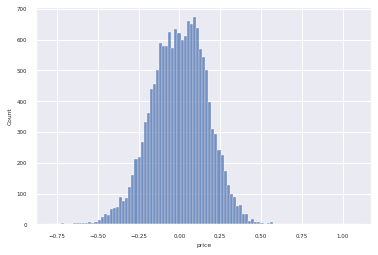

In [90]:
# Error Distribution
plt.figure()
sns.histplot((y_test_log-pred1))

# MAE, MSE, RMSE & R-square
lr_rsquare=metrics.r2_score(y_test_log, pred1)
print('Mean Square Error:',metrics.mean_absolute_error(y_test_log, pred1))
print('Mean Square Error:',metrics.mean_squared_error(y_test_log, pred1))
print(' Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test_log, pred1)))
print('R Square:', metrics.r2_score(y_test_log,pred1))

Mean Square Error: 0.13719690496054915
Mean Square Error: 0.029587829837271894
Root Mean Square Error: 0.17201113288758926
R Square: 0.9692288936520698


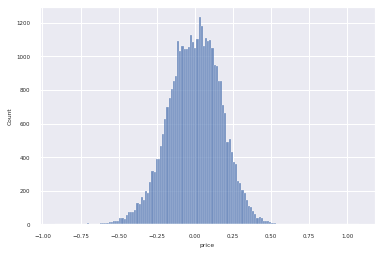

In [91]:
# Error Distribution
plt.figure()
sns.histplot((y_train_log-pred2))

# MAE, MSE, RMSE & R-square
lr_rsquare=metrics.r2_score(y_train_log, pred2)
print('Mean Square Error:',metrics.mean_absolute_error(y_train_log, pred2))
print('Mean Square Error:',metrics.mean_squared_error(y_train_log, pred2))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_train_log, pred2)))
print('R Square:', metrics.r2_score(y_train_log,pred2))

In [92]:
rmse_scores_train_lr = cross_val_score(lr, X_train_log, y_train_log, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores_test_lr = cross_val_score(lr, X_test_log, y_test_log, cv=5, scoring='neg_root_mean_squared_error')

In [93]:
# Sebelum Tuning

print("Hasil Cross-Validation RMSE (train data)")
print(f"Linear Regression: {rmse_scores_train_lr.mean()}")

print("Hasil Cross-Validation RMSE (test data)")
print(f"Linear Regression: {rmse_scores_test_lr.mean()}")

Hasil Cross-Validation RMSE (train data)
Linear Regression: -0.17208466008740192
Hasil Cross-Validation RMSE (test data)
Linear Regression: -0.17111266503454076


In [94]:
parameters = {'copy_X': [True, False], 'fit_intercept': [True, False], 'positive':[True, False]}

print(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [95]:
grid_search = GridSearchCV(lr, parameters, scoring='r2', cv=5)
grid_search.fit(X_train_log, y_train_log)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'copy_X': True, 'fit_intercept': True, 'positive': True}
0.96919731965016


In [96]:
lr2 = LinearRegression(copy_X= True, fit_intercept= True, positive= True)
lr2.fit(X_train_log, y_train_log)

pred3=lr2.predict(X_test_log)

Mean Square Error: 0.1372858991434608
Mean Square Error: 0.029250928435482153
Root Mean Square Error: 0.1710290280492822
R Square: 0.9693437666023584


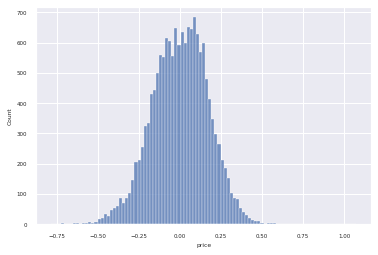

In [97]:
# Error Distribution
plt.figure()
sns.histplot((y_test_log-pred3))

# MAE, MSE, RMSE & R-square
lr_rsquare=metrics.r2_score(y_test_log, pred3)
print('Mean Square Error:',metrics.mean_absolute_error(y_test_log, pred3))
print('Mean Square Error:',metrics.mean_squared_error(y_test_log, pred3))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test_log, pred3)))
print('R Square:', metrics.r2_score(y_test_log,pred3))

In [98]:
rmse_scores_train_lr2 = cross_val_score(lr2, X_train_log, y_train_log, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores_test_lr2 = cross_val_score(lr2, X_test_log, y_test_log, cv=5, scoring='neg_root_mean_squared_error')

In [99]:
# Setelah Tuning

print("Hasil Cross-Validation RMSE (train data)")
print(f"Linear Regression: {rmse_scores_train_lr2.mean()}")

print("Hasil Cross-Validation RMSE (test data)")
print(f"Linear Regression: {rmse_scores_test_lr2.mean()}")

Hasil Cross-Validation RMSE (train data)
Linear Regression: -0.17207563604101211
Hasil Cross-Validation RMSE (test data)
Linear Regression: -0.17108645787790608


In [100]:
mae_scores_train_lr2 = cross_val_score(lr2, X_train_log, y_train_log, cv=5, scoring='neg_mean_absolute_error')
mae_scores_test_lr2 = cross_val_score(lr2, X_test_log, y_test_log, cv=5, scoring='neg_mean_absolute_error')

In [101]:
print("Hasil Cross-Validation MAE (train data)")
print(f"Linear Regression: {mae_scores_train_lr2.mean()}")

print("Hasil Cross-Validation MAE (test data)")
print(f"Linear Regression: {mae_scores_test_lr2.mean()}")

Hasil Cross-Validation MAE (train data)
Linear Regression: -0.13723219132544523
Hasil Cross-Validation MAE (test data)
Linear Regression: -0.1372878029792815


In [102]:
models = pd.DataFrame({'Model': ['Sebelum Tuning', 'Sesudah Tuning'],
                       'RMSE Score (test data)': [rmse_scores_test_lr.mean(), rmse_scores_test_lr2.mean()]})

models.sort_values(by = 'RMSE Score (test data)', ascending = False, ignore_index = True)

Model  RMSE Score (test data)
0  Sesudah Tuning               -0.171086
1  Sebelum Tuning               -0.171113

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> XGBoostRegressor</p>

In [103]:
X_train_log1 = X_train_log.copy()
X_train_log2 = X_train_log.copy()

y_train_log1 = y_train_log.copy()
y_train_log2 = y_train_log.copy()

In [104]:
# buat objek XGBRegressor
xgbrrs = XGBRegressor()

# tampilkan semua parameter
params = xgbrrs.get_params()
params

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [105]:
# create XGBoost model
model = XGBRegressor()

# fit the model with training data
model.fit(X_train_log1, y_train_log1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
# evaluate the model on test data
y_pred = model.predict(X_test_log)

# evaluate the model
r2 = r2_score(y_test_log, y_pred)
mse = mean_squared_error(y_test_log, y_pred)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("MSE:", mse)
print("RMSE:",rmse)

R^2 score: 0.9925010107205996
MSE: 0.007155229930075661
RMSE: 0.08458859219821348


In [107]:
# set hyperparameters for grid search
params = {
    'learning_rate': [0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200, 300]
}

# create XGBoost model
model = XGBRegressor()

# perform grid search
grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train_log1, y_train_log1)

# best hyperparameters
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 300}


In [108]:
dtrain = xgb.DMatrix(data = X_train_log2, label = y_train_log2)

xgb_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.15, max_depth = 5, n_estimators = 300)
start_xgb_train = timer()
xgb_reg.fit(X_train_log2, y_train_log2)
end_xgb_train = timer()
train_time_xgb = end_xgb_train - start_xgb_train

[15:34:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [109]:
# evaluate the model on test data
preds = xgb_reg.predict(X_test_log)

# evaluate the model
r2 = r2_score(y_test_log, preds)
mse = mean_squared_error(y_test_log, preds)
rmse = np.sqrt(mse)

print("R^2 score:", r2)
print("MSE:", mse)
print("RMSE:",rmse)

R^2 score: 0.992772681213889
MSE: 0.006896013017998975
RMSE: 0.08304223634993807


In [110]:
rmse_scores_train_xgb = cross_val_score(xgb_reg, X_train_log2, y_train_log2, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores_test_xgb = cross_val_score(xgb_reg, X_test_log, y_test_log, cv=5, scoring='neg_root_mean_squared_error')

[15:34:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:30] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:32] WARNING: ../src/objective/regression_

In [111]:
print("Hasil Cross-Validation RMSE (train data)")
print(f"XGBRegressor: {rmse_scores_train_xgb.mean()}")

print("Hasil Cross-Validation RMSE (test data)")
print(f"XGBRegressor: {rmse_scores_test_xgb.mean()}")

Hasil Cross-Validation RMSE (train data)
XGBRegressor: -0.08528296264850148
Hasil Cross-Validation RMSE (test data)
XGBRegressor: -0.08716601989105087


In [112]:
mae_scores_train_xgb = cross_val_score(xgb_reg, X_train_log2, y_train_log2, cv=5, scoring='neg_mean_absolute_error')
mae_scores_test_xgb = cross_val_score(xgb_reg, X_test_log, y_test_log, cv=5, scoring='neg_mean_absolute_error')

[15:35:36] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:15] WARNING: ../src/objective/regression_

In [113]:
print("Hasil Cross-Validation MAE (train data)")
print(f"XGBRegressor: {mae_scores_train_xgb.mean()}")

print("Hasil Cross-Validation MAE (test data)")
print(f"XGBRegressor: {mae_scores_test_xgb.mean()}")

Hasil Cross-Validation MAE (train data)
XGBRegressor: -0.062141632631333835
Hasil Cross-Validation MAE (test data)
XGBRegressor: -0.06365182706146437


## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;"> CatBoostRegressor</p>

Frame work modeling CatBoostRegressor

Cari best parameter pake GridSearchCV -> Dari best parameter modeling pake iterasi tinggi di pipeline


Kenapa pake CatBoost?
- Out of the box, default parameternya bagus
- Memiliki performa bagus di fitur kategori
- Memiliki overfitting detector

In [114]:
# CatBoost using Auto Categorical
diamond_categories = np.array([1, 2, 3])

params = {'iterations':10000,
        'cat_features':diamond_categories,
        'verbose':False,
        'od_type':'Iter'}

cat_regressor = CatBoostRegressor(**params)
cat_regressor.fit(X_train_cat, y_train_log, eval_set=(X_test_cat, y_test_log), use_best_model=True, plot= True );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

![Picture title](image-20230310-140338.png)

In [116]:
rmse_scores_train_cat = cross_val_score(cat_regressor, X_train_cat, y_train_log, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores_test_cat = cross_val_score(cat_regressor, X_test_cat, y_test_log, cv=5, scoring='neg_root_mean_squared_error')

In [117]:
print("Hasil Cross-Validation RMSE (train data)")
print(f"CatBoost internal categorical: {rmse_scores_train_cat.mean()}")

print("Hasil Cross-Validation RMSE (test data)")
print(f"CatBoost internal categorical: {rmse_scores_test_cat.mean()}")

Hasil Cross-Validation RMSE (train data)
CatBoost internal categorical: -0.08412170554546305
Hasil Cross-Validation RMSE (test data)
CatBoost internal categorical: -0.08619235972618064


In [125]:
# CatBoost No Auto Categorical (Manual Label Encoder)

params = {'iterations':10000,
        'verbose':False,
        'od_type':'Iter'}

cat_regressor_2 = CatBoostRegressor(**params)
start_cat_train = timer()
cat_regressor_2.fit(X_train_cat, y_train_log, eval_set=(X_test_cat, y_test_log), use_best_model=True, plot= True  );
end_cat_train = timer()
train_time_cat = (end_cat_train - start_cat_train)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [126]:
rmse_scores_train_nocat = cross_val_score(cat_regressor_2, X_train_log, y_train_log, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores_test_nocat = cross_val_score(cat_regressor_2, X_test_log, y_test_log, cv=5, scoring='neg_root_mean_squared_error')

In [127]:
print("Hasil Cross-Validation RMSE (train data)")
print(f"CatBoost label encoder: {rmse_scores_train_nocat.mean()}")

print("Hasil Cross-Validation RMSE (test data)")
print(f"CatBoost label encoder: {rmse_scores_test_nocat.mean()}")

Hasil Cross-Validation RMSE (train data)
CatBoost label encoder: -0.08289585090824016
Hasil Cross-Validation RMSE (test data)
CatBoost label encoder: -0.0847033124719891


![Picture title](image-20230310-140455.png)

### <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">GridSearchCV on  CatBoostRegressor</p>

In [128]:
from sklearn.model_selection import GridSearchCV

# In most cases, the optimal depth ranges from 4 to 10. Values in the range from 6 to 10 are recommended.
# Coefficient at the L2 regularization term of the cost function.

parameters = {
        'l2_leaf_reg': [2, 3, 4],
        'depth': [4, 6, 8],
        'iterations': [10000],
        'od_type':['Iter'],
        #'task_type':['GPU']
}

In [129]:
cat_regressor3 = CatBoostRegressor()

grid = GridSearchCV(estimator=cat_regressor3,
                param_grid = parameters,
                scoring='neg_root_mean_squared_error',
                cv=2,
                n_jobs=1)


grid.fit(X_train_cat, y_train_log)

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.0664881	total: 57.5s	remaining: 57.5s
5001:	learn: 0.0664850	total: 57.5s	remaining: 57.5s
5002:	learn: 0.0664831	total: 57.5s	remaining: 57.5s
5003:	learn: 0.0664811	total: 57.5s	remaining: 57.4s
5004:	learn: 0.0664787	total: 57.5s	remaining: 57.4s
5005:	learn: 0.0664772	total: 57.5s	remaining: 57.4s
5006:	learn: 0.0664745	total: 57.6s	remaining: 57.4s
5007:	learn: 0.0664712	total: 57.6s	remaining: 57.4s
5008:	learn: 0.0664683	total: 57.6s	remaining: 57.4s
5009:	learn: 0.0664658	total: 57.6s	remaining: 57.4s
5010:	learn: 0.0664626	total: 57.6s	remaining: 57.3s
5011:	learn: 0.0664600	total: 57.6s	remaining: 57.3s
5012:	learn: 0.0664584	total: 57.6s	remaining: 57.3s
5013:	learn: 0.0664569	total: 57.6s	remaining: 57.3s
5014:	learn: 0.0664520	total: 57.6s	remaining: 57.3s
5015:	learn: 0.0664500	total: 57.6s	remaining: 57.3s
5016:	learn: 0.0664489	total: 57.6s	remaining: 57.3s
5017:	learn: 0.0664476	total: 57.7s	remaining: 5

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f4c6d2d65b0>,
             n_jobs=1,
             param_grid={'depth': [4, 6, 8], 'iterations': [10000],
                         'l2_leaf_reg': [2, 3, 4], 'od_type': ['Iter']},
             scoring='neg_root_mean_squared_error')

In [130]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 -0.08478447903559613

 The best parameters across ALL searched params:
 {'depth': 8, 'iterations': 10000, 'l2_leaf_reg': 4, 'od_type': 'Iter'}


Konfigurasi terbaik CatBoostRegressor:

- pake fitur kategorikal
- l2_leaf_reg: 4
- depth: 8

In [ ]:
rmse_scores_train_tuned = cross_val_score(grid, X_train_log, y_train_log, cv=2, scoring='neg_root_mean_squared_error')
rmse_scores_test_tuned = cross_val_score(grid, X_test_log, y_test_log, cv=2, scoring='neg_root_mean_squared_error')

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.0580524	total: 16.8s	remaining: 16.8s
5001:	learn: 0.0580513	total: 16.8s	remaining: 16.8s
5002:	learn: 0.0580440	total: 16.8s	remaining: 16.8s
5003:	learn: 0.0580424	total: 16.8s	remaining: 16.8s
5004:	learn: 0.0580382	total: 16.8s	remaining: 16.8s
5005:	learn: 0.0580353	total: 16.9s	remaining: 16.8s
5006:	learn: 0.0580323	total: 16.9s	remaining: 16.8s
5007:	learn: 0.0580310	total: 16.9s	remaining: 16.8s
5008:	learn: 0.0580298	total: 16.9s	remaining: 16.8s
5009:	learn: 0.0580275	total: 16.9s	remaining: 16.8s
5010:	learn: 0.0580258	total: 16.9s	remaining: 16.8s
5011:	learn: 0.0580246	total: 16.9s	remaining: 16.8s
5012:	learn: 0.0580221	total: 16.9s	remaining: 16.8s
5013:	learn: 0.0580190	total: 16.9s	remaining: 16.8s
5014:	learn: 0.0580163	total: 16.9s	remaining: 16.8s
5015:	learn: 0.0580141	total: 16.9s	remaining: 16.8s
5016:	learn: 0.0580080	total: 16.9s	remaining: 16.8s
5017:	learn: 0.0580048	total: 16.9s	remaining: 1

In [ ]:
print("Hasil Cross-Validation RMSE (train data)")
print(f"CatBoost label encoder: {rmse_scores_train_tuned.mean()}")

print("Hasil Cross-Validation RMSE (test data)")
print(f"CatBoost label encoder: {rmse_scores_test_tuned.mean()}")

Hasil Cross-Validation RMSE (train data)
CatBoost label encoder: -0.083898909162469
Hasil Cross-Validation RMSE (test data)
CatBoost label encoder: -0.08764459217763534


In [ ]:
models = pd.DataFrame({'Model': ['Auto Categorical', 'Manual Label Encoding', 'Manual Label Encoding & Tuned'],
                       'RMSE Score (test data)': [rmse_scores_test_cat.mean(), rmse_scores_test_nocat.mean(), rmse_scores_test_tuned.mean()]})

models.sort_values(by = 'RMSE Score (test data)', ascending = False, ignore_index = True)

Model  RMSE Score (test data)
0          Manual Label Encoding               -0.084703
1               Auto Categorical               -0.086192
2  Manual Label Encoding & Tuned               -0.087645

## <p style="background-color:#25316D;font-family:newtimeroman;color:#FEF5AC;font-size:80%;text-align:center;border-radius:10px 10px;">Final Model Comparison</p>

In [ ]:
# Final model
# XGBoost : xgb_reg
# CatBoost : grid

# Model Linear Regression prediction on test data
start_lr = timer()
pred_lr = lr.predict(X_test_log)
end_lr = timer()
pred_time_lr = end_lr - start_lr
r2_lr = r2_score(y_test_log, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_log, pred_lr))

# Model XGB prediction on test data
start_xgb = timer()
pred_xgb = xgb_reg.predict(X_test_log)
end_xgb = timer()
pred_time_xgb = end_xgb - start_xgb

r2_xgb = r2_score(y_test_log, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_log, pred_xgb))

# Model Cat prediction on test data
start_cat = timer()
pred_cat = grid.predict(X_test_cat)
end_cat = timer()
pred_time_cat = end_cat - start_cat

r2_cat = r2_score(y_test_log, pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test_log, pred_cat))

In [ ]:
models = pd.DataFrame({'Model': ['Linear Regression', 'XGBRegressor', 'CatBoostRegressor'],
                       'RMSE Score (test data)': [rmse_scores_test_lr.mean(), rmse_scores_test_xgb.mean(), rmse_scores_test_cat.mean()]})

models.sort_values(by = 'RMSE Score (test data)', ascending = False, ignore_index = True)

Model  RMSE Score (test data)
0  CatBoostRegressor               -0.086192
1       XGBRegressor               -0.087166
2  Linear Regression               -0.171113

In [ ]:
training_time = pd.DataFrame({'Model': ['Linear Regression', 'XGBRegressor', 'CatBoostRegressor'],
                       'Time(s)': [train_time_lr, train_time_xgb, train_time_cat]})

training_time.sort_values(by = 'Time(s)', ascending = True, ignore_index = True)

Model    Time(s)
0  Linear Regression   0.022732
1       XGBRegressor   8.676250
2  CatBoostRegressor  68.303094

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=training_time['Model'], y=training_time['Time(s)'],
            text=training_time['Time(s)'],
            textposition='auto',
            width=0.5
            
        )])
fig.update_layout(
    title='Training Time(s)',
    width=600,
    height=600)
fig.show()

In [ ]:
prediction_time = pd.DataFrame({'Model': ['Linear Regression', 'XGBRegressor', 'CatBoostRegressor'],
                       'Time(s)': [pred_time_lr, pred_time_xgb, pred_time_cat]})

prediction_time.sort_values(by = 'Time(s)', ascending = True, ignore_index = True)

Model   Time(s)
0  Linear Regression  0.004809
1       XGBRegressor  0.135142
2  CatBoostRegressor  0.275554

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=prediction_time['Model'], y=prediction_time['Time(s)'],
            text=prediction_time['Time(s)'],
            textposition='auto',
            width=0.5
            
        )])
fig.update_layout(
    title='Prediction Time(s)',
    width=600,
    height=600)
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbe598bf-8a86-49e0-9eca-c75439d09668' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>